<a href="https://colab.research.google.com/github/Misheal-22/Implementation-of-neural-network-from-scratch-on-MNIST-data/blob/main/MishealNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/digit-recognizer/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: misheal22
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 1.20GB/s]


Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [6]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.

In [7]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.
_, m_train = X_train.shape

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))
    return expZ / expZ.sum(axis=0)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

In [9]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [10]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

In [11]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m_train * dZ3.dot(A2.T)
    db3 = 1 / m_train * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

In [12]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

In [13]:
def get_predictions(A3):
    return np.argmax(A3, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [14]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3,
                                               dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A3)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy {acc:.4f}")
    return W1, b1, W2, b2, W3, b3

In [15]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=500)

Iteration 0: Accuracy 0.1071
Iteration 10: Accuracy 0.4849
Iteration 20: Accuracy 0.6057
Iteration 30: Accuracy 0.6756
Iteration 40: Accuracy 0.7155
Iteration 50: Accuracy 0.7479
Iteration 60: Accuracy 0.7688
Iteration 70: Accuracy 0.7864
Iteration 80: Accuracy 0.7993
Iteration 90: Accuracy 0.8104
Iteration 100: Accuracy 0.8201
Iteration 110: Accuracy 0.8279
Iteration 120: Accuracy 0.8343
Iteration 130: Accuracy 0.8408
Iteration 140: Accuracy 0.8458
Iteration 150: Accuracy 0.8505
Iteration 160: Accuracy 0.8549
Iteration 170: Accuracy 0.8591
Iteration 180: Accuracy 0.8629
Iteration 190: Accuracy 0.8662
Iteration 200: Accuracy 0.8697
Iteration 210: Accuracy 0.8728
Iteration 220: Accuracy 0.8757
Iteration 230: Accuracy 0.8776
Iteration 240: Accuracy 0.8806
Iteration 250: Accuracy 0.8832
Iteration 260: Accuracy 0.8852
Iteration 270: Accuracy 0.8875
Iteration 280: Accuracy 0.8894
Iteration 290: Accuracy 0.8913
Iteration 300: Accuracy 0.8930
Iteration 310: Accuracy 0.8950
Iteration 320: Accu

In [16]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    return get_predictions(A3)

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index].reshape(-1, 1)
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction:", prediction[0])
    print("Label:", label)
    plt.gray()
    plt.imshow(current_image.reshape(28, 28) * 255, interpolation='nearest')
    plt.show()

Prediction: 5
Label: 5


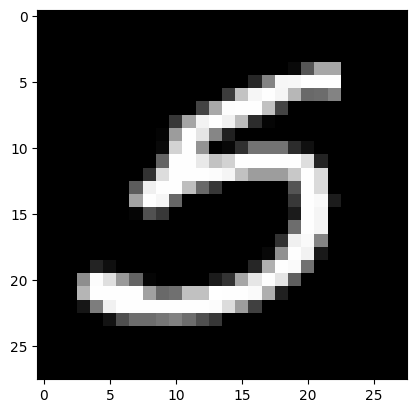

Prediction: 9
Label: 9


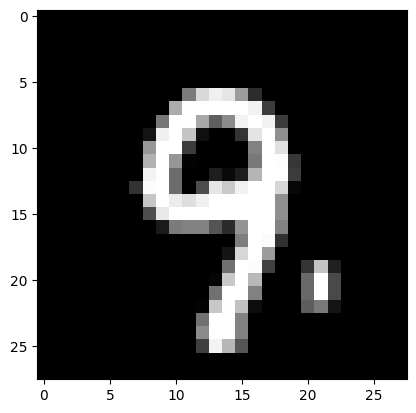

Prediction: 0
Label: 0


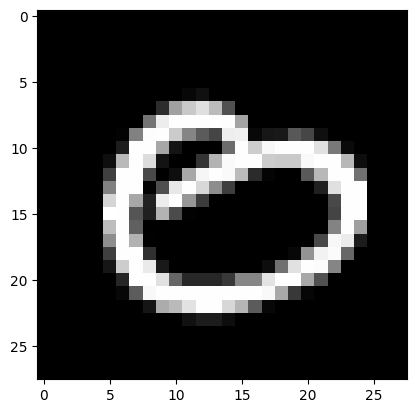

Prediction: 5
Label: 5


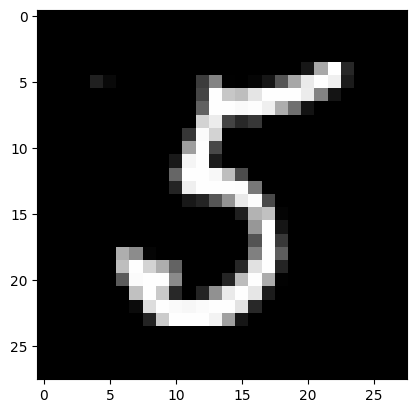

In [17]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [19]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

np.float64(0.916)